# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

## Цель
На основе данных, предоставленных компанией, необходимо провести анализ, разобраться в причинах убытках, которые компания терпит, вкладывая в рекламу и помочь компании выйти в плюс.

## Задачи
Провести анализ и ответить на вопросы:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## Данные
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

## Описание данных
В вашем распоряжении три датасета.
  Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  
  Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

  Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

  Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

## 1. Изучение общей информации

Импортируем библиотеки, cчитаем данные из csv-файлов в датафреймы и сохраним их в соотвествующие переменные.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [ ]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

### visits

In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

### orders

In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

### costs

In [ ]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

Пропусков как таковых нет, приведём названия столбцов к хорошему стилю и поработаем над типами данных.

## 2. Предобработка данных

Для начала проверим наличие дубликатов, если они есть удалим.

In [ ]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Приведем наименования столбцов к хорошему стилю.

In [ ]:
visits.columns = visits.columns.str.lower()
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Преобразуем данные в подходящие типы.

In [ ]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


## 3. Исследовательский анализ данных

### профили пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.head(15)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Для того, чтобы посчитать минимальную и максимальную даты привлечения необходимо установить момент и горизонт анализа. По условиям задания мы считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Значит возьмем горизон анализа равный 14.

In [ ]:
analysis_horizon = 14  # горизонт анализа
observation_date = profiles['dt'].max()  # момент анализа

Считаем минимальную и максимальную даты привлечения.

In [ ]:
min_analysis_date = profiles['dt'].min()
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1)
display(min_analysis_date)
display(max_analysis_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 14)

* Минимальная дата привлечения пользователей: 2019-05-01
* Максимальная дата привлечения пользователей: 2019-10-14

### страны

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
countries = (profiles
            .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
countries['%-payer'] = countries.payer / (countries.not_payer + countries.payer) * 100
countries

payer,not_payer,payer,%-payer
region,,,
United States,93100,6902,6.901862
UK,16875,700,3.982930
France,16787,663,3.799427
Germany,14365,616,4.111875


Большинство пользователей приложения - пользователи из США, также пользователи США составляют наибольший процент платящий пользователей от общего количества пользователей страны. На втором месте - Великобритания и Франция, они имеют менее 4% платящих пользователей. На последнем месте по количеству привлеченных пользователей - Германия, хотя она имеет больший процент платящий пользователей (более 4%).

### устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
devices =   (profiles
            .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
devices['%-payer'] = devices.payer / (devices.not_payer + devices.payer) * 100
devices

payer,not_payer,payer,%-payer
device,,,
iPhone,51097,3382,6.207897
Android,32982,2050,5.851793
Mac,28130,1912,6.364423
PC,28918,1537,5.046790


Большинство пользователей приложения - владельцы iPhone, также они на ходятся на втором месте по доле платящий пользователей среди данного устройства - 6.21%. На втором месте - владельцы Android, доля платящий клиентов - 5.85%. На третьем месте по количеству пользователей - пользователи Mac, пользователи данного устройства имеют самую большую долю платящий пользователей - 6.34%. И самая непопулярная категория - пользователи PC - самая маленькая и самая неплатящая - 5.05%.

### каналы привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
channels =   (profiles
            .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
channels['%-payer'] = channels.payer / (channels.not_payer + channels.payer) * 100
channels

payer,not_payer,payer,%-payer
channel,,,
FaceBoom,25587,3557,12.204914
TipTop,17683,1878,9.600736
organic,55279,1160,2.055316
WahooNetBanner,8100,453,5.296387
AdNonSense,3440,440,11.340206
RocketSuperAds,4096,352,7.913669
LeapBob,8291,262,3.063253
OppleCreativeMedia,8372,233,2.707728
lambdaMediaAds,1924,225,10.469986


На удивление большинство пользователей приложения приходят не из рекламы - органические пользователи, но доля платящих пользователей у них сама низкая - 2.06%.
Если мы говорим о самых больших долях платящих пользователей, то это определенно - FaceBoom, AdNonSense и lambdaMediaAds (не смотря на то, что в принципе пользователей они привлекают значительно меньше) и TipTop.


## 4. Маркетинг

### общая сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [ ]:
costs.costs.sum().round()

105497.0

Общая сумма расходов на маркетинг составляет: 105497.0.

### распределение трат по рекламным источникам

In [ ]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Большего всего вкладывают в TipTop и FaceBoom.

### визуализация динамики изменения расходов во времени

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.week
costs['month'] = costs['dt'].dt.month

/tmp/ipykernel_96/1612576917.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs['week'] = costs['dt'].dt.week


### по неделям

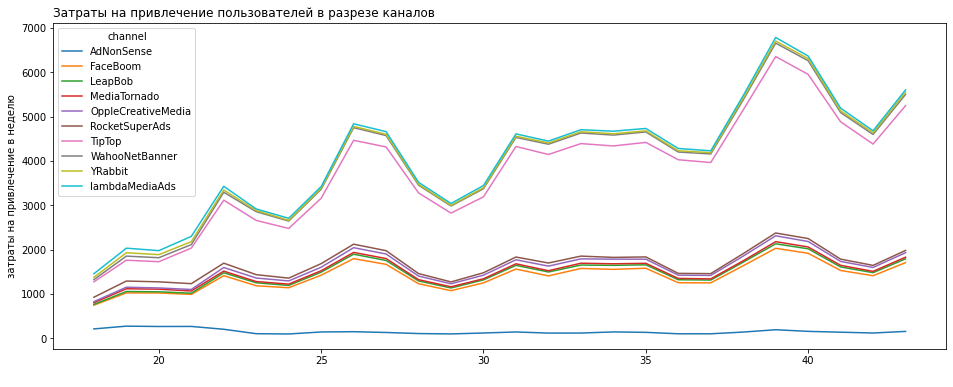

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index=costs.week,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов', loc='left')
ax.set_ylabel('затраты на привлечение в неделю')
ax.set_xlabel(' ')
plt.show()

### по месяцам

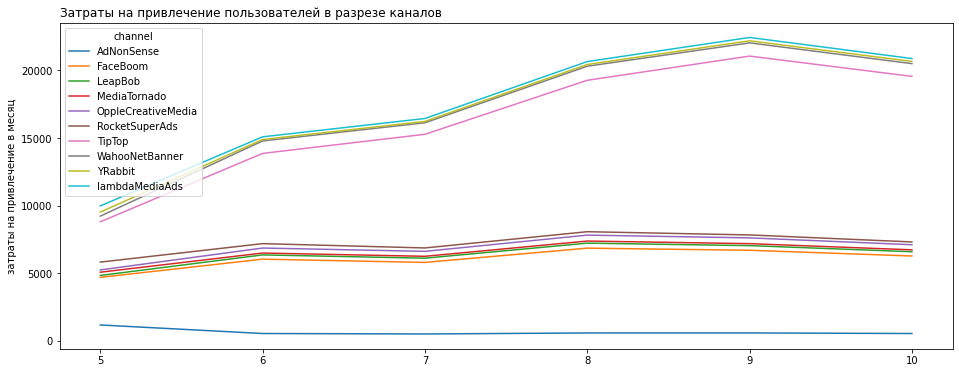

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index=costs.month,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов', loc='left')
ax.set_ylabel('затраты на привлечение в месяц')
ax.set_xlabel(' ')
plt.show()

По данным графикам видно, что расходы на рекламу в целом растут.

### cac

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

Рассчитаем средний CAC на одного пользователя из каждого источника.

In [ ]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самый дорогой пользователь безусловно из TipTop, далее из FaceBoom и AdNonSense.

## 5. Окупаемость рекламы


### окупаемость рекламы c помощью графиков LTV и ROI (а также графики динамики LTV, CAC и ROI)

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также построим графики динамики LTV, CAC и ROI.

Будем использовать функции, с которыми мы познакомились в теоретических уроках - get_ltv() — для подсчёта LTV, plot_ltv_roi - для визуализации LTV и ROI и filter_data() — для сглаживания данных.

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Органических пользователей не будет включать в анализ, так как они пришли естественным путём и их привлечение компании ничего не стоило.

In [ ]:
profiles = profiles.query('channel != "organic"')

Посчитаем LTV, ROI и построим графики.

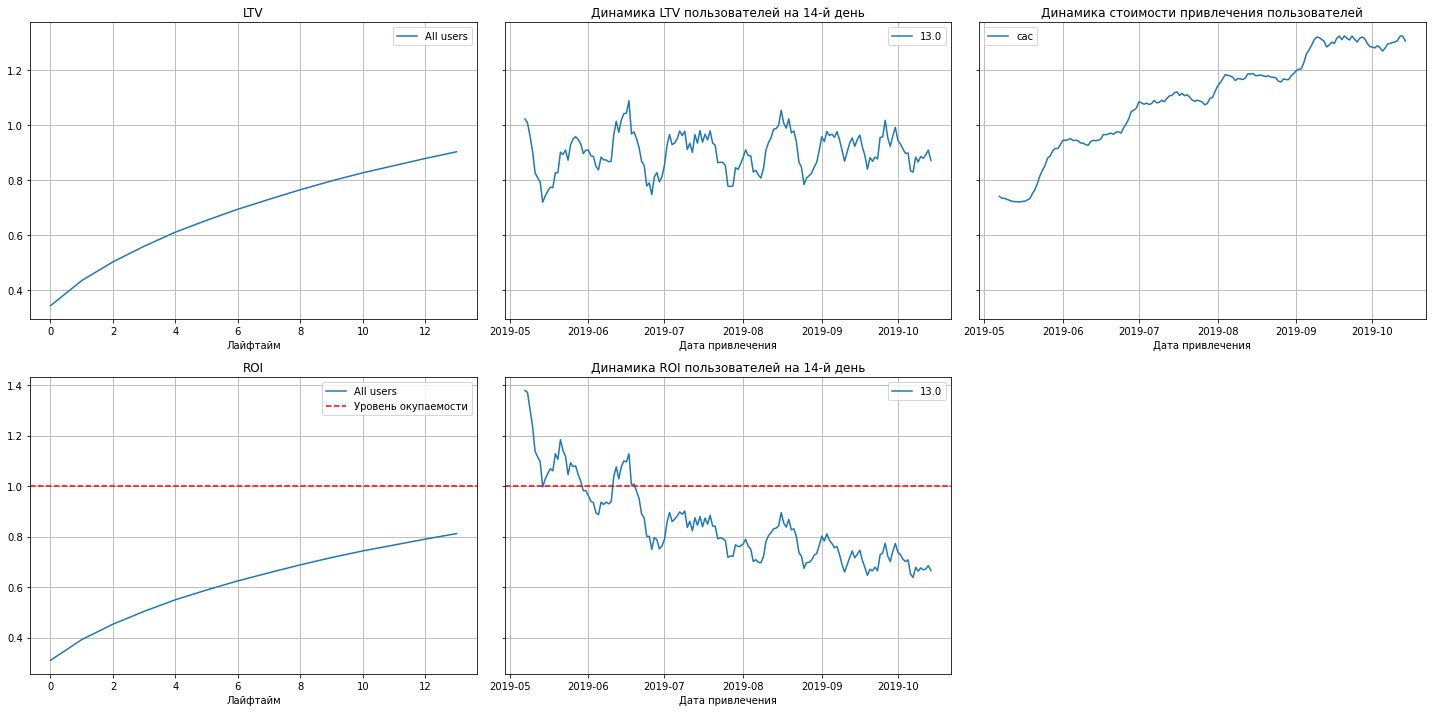

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Вывод:
* начиная с июня 2019 года привлеченные пользователи не окупаются;
* реклама не окупается к 2 неделям и далее не окупается;
* рекламный бюджет при этом увеличивается (рост CAC).

Стабильность `LTV` и рост `CAC`, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.

### конверсия пользователей и динамика её изменения

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Будем использовать функции, с которыми мы познакомились в теоретических уроках - get_retention() - для подсчёта Retention Rate, get_conversion() — для подсчёта конверсии, plot_retention() — для построения графика Retention Rate, plot_conversion() — для построения графика конверсии.

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Посчитаем и построим график для конверсии.

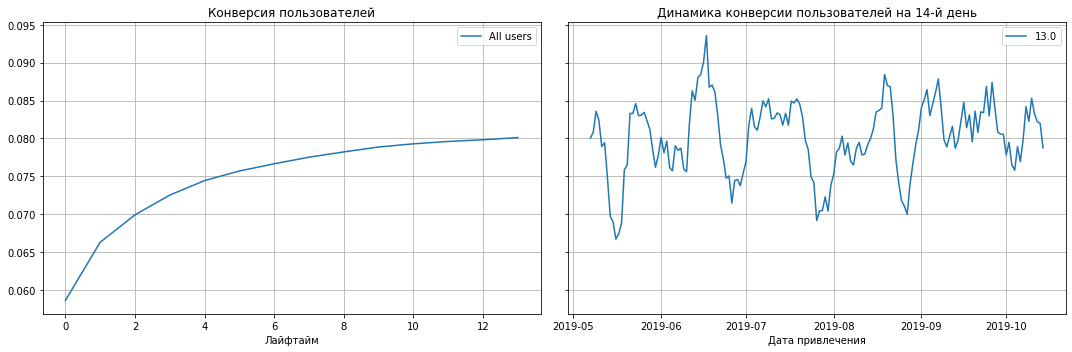

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, analysis_horizon)
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Все пользователи хорошо конверсируются, динамика как растёт, так и падает - нестабильна, надо смотреть дальше конкретнее.

Посчитаем и построим график для удержания.

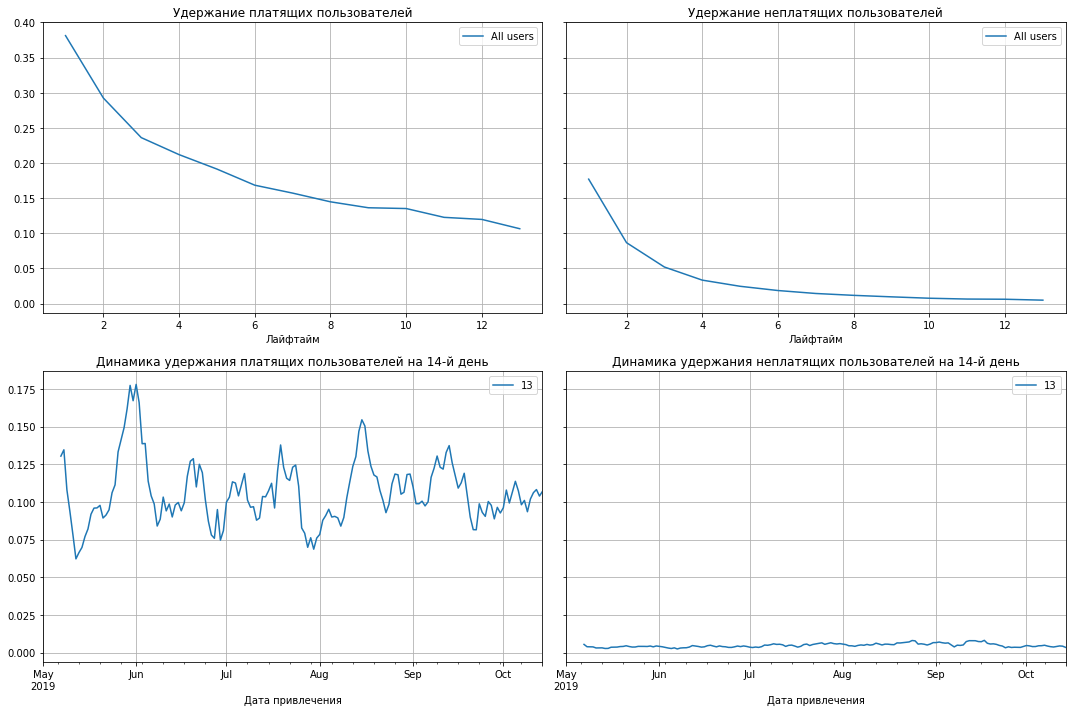

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon)
plot_retention(retention_grouped, retention_history, analysis_horizon)

Очевидно, неплатящие пользователи вовсе не удерживаются, но проблема в том, что удержание платящих пользователей со временем стремится к нулю.

### окупаемость рекламы с разбивкой по устройствам + конверсия и удержание

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

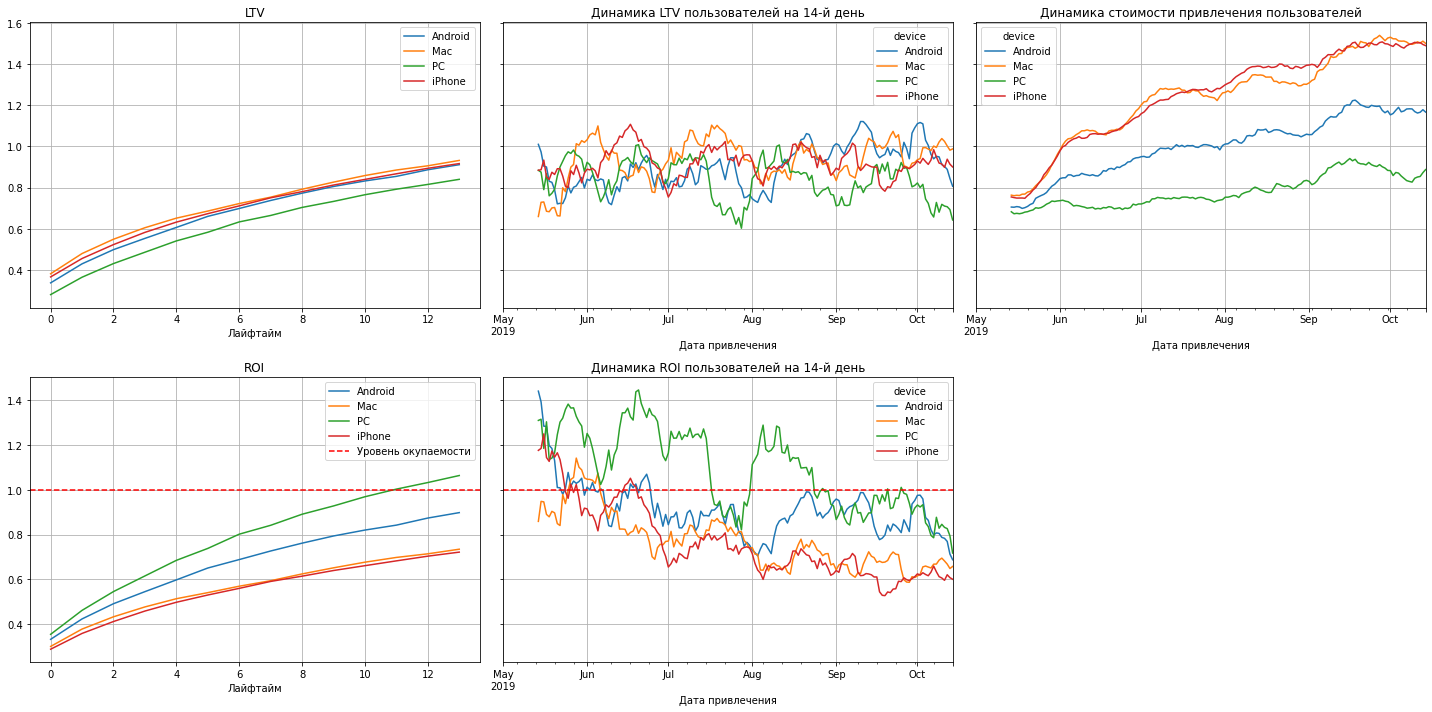

In [ ]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14)

* стоимость привлечения пользователей с техникой компании Apple только растёт, но эти пользователи совершенно не окупаются;
* пользователи, которые пользуются PC - хороший вариант, стоимость привлечения самая низкая, высокие показатели пожизненной ценности клиента.

### окупаемость рекламы с разбивкой по странам + конверсия и удержание

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

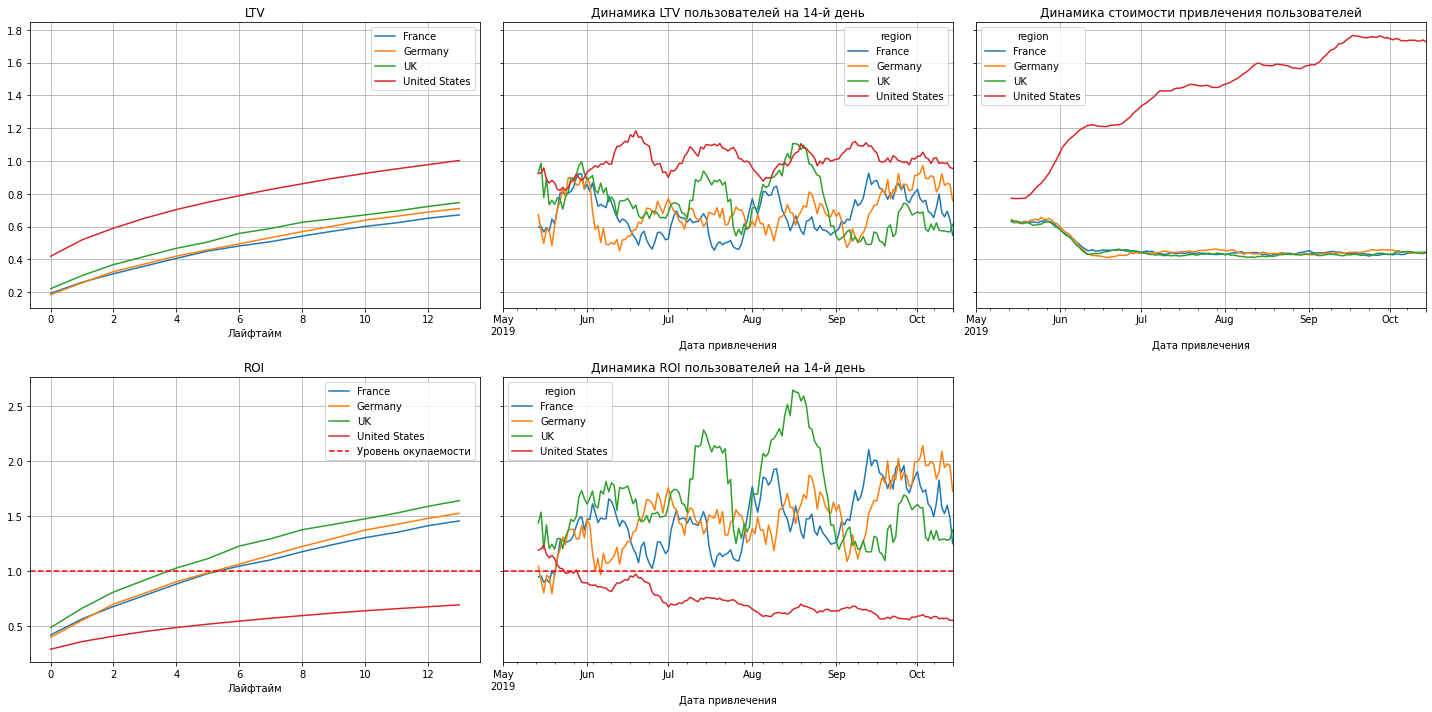

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14)

* основной сегмент приложения - пользователи из США, но как они быстро приходят, также быстро и уходят;
* затраты на рекламу в Европеском сегменте стабильны, также стабильно они окупаются, в США же растут и перестали окупаться с июня.

Посчитаем и построим график для конверсии.

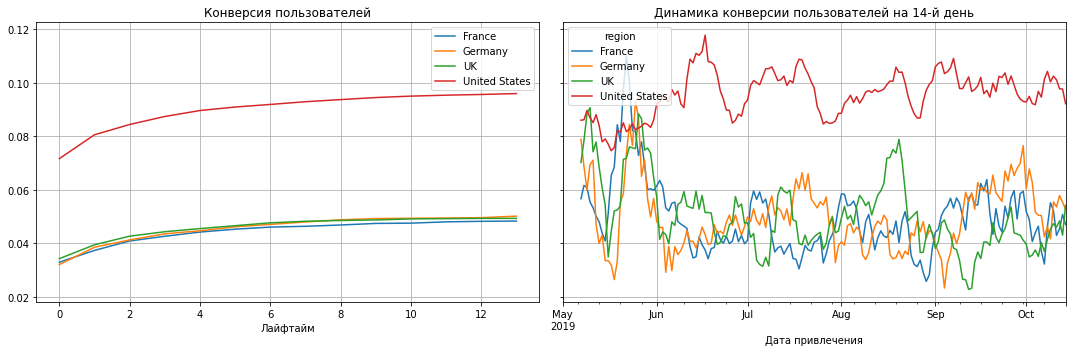

In [ ]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия США больше конверсии друх стран почти в 2 раза, даже в динамике.

Посчитаем и построим график для удержания.

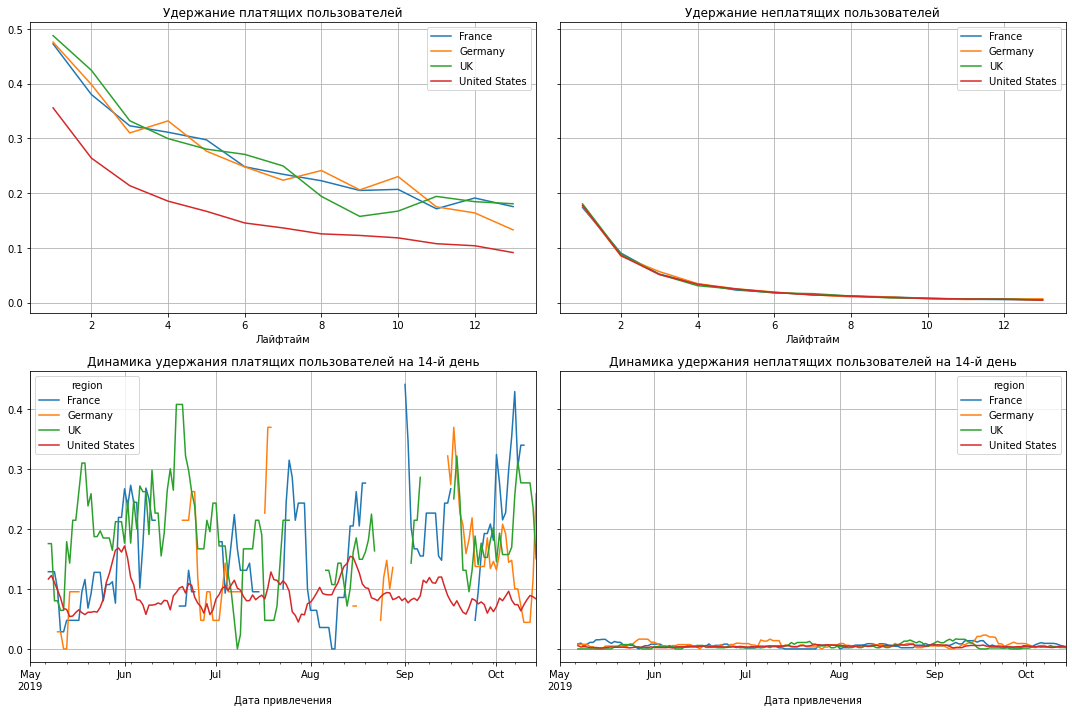

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, analysis_horizon)

А вот удерживаются платные пользователи США хуже остальных стран, неплатящие пользователи также не удерживаются вовсе.

### окупаемость рекламы с разбивкой по рекламным каналам + конверсия и удержание

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14)

Посчитаем и построим график для конверсии.

In [ ]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. Но вообще, динамики у всех пользователей в течение двухнедельного лайфтайма практически и нет.

Посчитаем и построим график для удержания.

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, analysis_horizon)

Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense.

Построим тепловую карту.

In [ ]:
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']),
    annot=True,
    fmt='.2%',
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

В лидерах - FaceBoom, AdNonSense, lambdaMediaAds, но они стабильны - конверсия не растет. Как таковой динамики конверсии практически нет.

Можем сделать следующие выводы:
* затраты, на которые тратится практически весь рекламный бюджет не окупаются;
* затраты на TipTop увеличиваются каждый месяц и они вообще не окупаются;
* большие затраты на FaceBoom не окупаются.

### вывод

Сделаем вывод по общему анализу:
* если мы посмотрим на все проанализированные данные, то можно сказать что в целом реклама не окупается;
* основная масса пользователей - пользователи из США, а в данной стране мы наблюдаем низкую окупаемость, даже не смотря на то, что пользователи из США конверсируются больше, но они не удерживаются и не становятся платящими пользователями;
* если смотреть по устройствам - то явно отстают пользователи PC, но при этом они неплохо удерживаются;
* если посмотреть на рекламные каналы и принимать во внимание рассчитанный CAC - то самый дорогой пользователь TipTop себя не окупает вовсе, стоит отметить и FaceBoom - занимает второе место по стоимости пользователя, но при этом имеет самое низкое удержание.

## Причины неэффективности привлечения пользователей  и рекомендации для отдела маркетинга.

### причины неэффективности привлечения пользователей

В результате анализа было выявлено, что основной причиной неокупаемости рекламы являются рекламные траты на привлечения самой большой группы пользователей - пользователей в США - посредствои рекламных каналов TipTop и FaceBoom - самый высокий CAC, а также Европы - AdNonceSence.
* очень высокая стоимость привлечения, которая в перспективе не окупается и при этом плохо удерживаются;
* высокие расходы на привлечение, которые в перспективе только растут.

### рекомендации

* отказаться от рекламных компаний приведенных выше в пользу других рекламных каналов;
* обратить внимание на Европейских пользователей, увеличить рекламные компании в этих странах;
* обратить внимание на органических пользователей: так как это существенная доля дохода.